In [1]:
# print_VRILE_stats
#
# Steven Cavallo
# May 2020
#
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, datetime, pylab
import pylab as P
from scipy.signal import butter, lfilter, filtfilt
from scipy import stats
from statsmodels.tsa.stattools import adfuller
#import pandas as pd

from mstats import *
import utilities_modules as um

print(mpl.__version__)

3.8.0


In [2]:
#year_range = np.arange(1979,2024,1)
year_range = np.arange(1989,2024,1)

#year_range = np.arange(1988,2018,1)
#year_range = np.arange(1998,2018,1)
#year_range = np.arange(2008,2018,1)

outpath_print = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/'
imagedir = '/Users/scavallo/Documents/scripts/python_scripts/images/'

write_annual_file = True
write_jja_file = True

label_fontsize = 16
num_files = 6
season_stats = 'jja' # 'ann', 'djf', 'mam', 'jja', or 'son'
indices2compare_a = [0,2] # 10 percentile
indices2compare_b = [1,3] # 10 percentile, Unique
indices2compare_c = [4,6] # 5 percentile
indices2compare_d = [5,7] # 5 percentile, Unique


fpath_cases1a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_10percentile.dat'
fpath_cases1b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_10percentile_dtUnique01.dat'
fpath_cases2a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_10percentile.dat'
fpath_cases2b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_10percentile_dtUnique01.dat'
fpath_cases3a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_allvriles_3d_10percentile.dat'
fpath_cases3b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_allvriles_3d_10percentile_dtUnique01.dat'

#fpath_cases1a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2019/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_5percentile.dat'
#fpath_cases1b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2019/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_5percentile_dtUnique01.dat'
#fpath_cases2a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2019/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_5percentile.dat'
#fpath_cases2b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2019/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_5percentile_dtUnique01.dat'
#fpath_cases3a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2019/rapid_seaice_loss_events_int_withboth_annual_allvriles_3d_5percentile.dat'
#fpath_cases3b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2019/rapid_seaice_loss_events_int_withboth_annual_allvriles_3d_5percentile_dtUnique01.dat'
#fpath_cases1a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2022/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_10percentile.dat'
#fpath_cases1b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2022/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_10percentile_dtUnique01.dat'
#fpath_cases2a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2022/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_10percentile.dat'
#fpath_cases2b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2022/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_10percentile_dtUnique01.dat'
#fpath_cases3a = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2022/rapid_seaice_loss_events_int_withboth_annual_allvriles_3d_10percentile.dat'
#fpath_cases3b = '/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2022/rapid_seaice_loss_events_int_withboth_annual_allvriles_3d_10percentile_dtUnique01.dat'

In [3]:
ntot_arr = []
ntot_per1_arr=[]
ntot_per2_arr=[]
ntot_per3_arr=[]

ntot_djf_arr=[]
ntot_mam_arr=[]
ntot_jja_arr=[]
ntot_son_arr=[]

ntot_djf_per1_arr=[]
ntot_mam_per1_arr=[]
ntot_jja_per1_arr=[]
ntot_son_per1_arr=[]

ntot_djf_per2_arr=[]
ntot_mam_per2_arr=[]
ntot_jja_per2_arr=[]
ntot_son_per2_arr=[]

ntot_djf_per3_arr=[]
ntot_mam_per3_arr=[]
ntot_jja_per3_arr=[]
ntot_son_per3_arr=[]

num_vs_year = np.empty([num_files,len(year_range)])
num_vs_year_djf = np.empty([num_files,len(year_range)])
num_vs_year_mam = np.empty([num_files,len(year_range)])
num_vs_year_jja = np.empty([num_files,len(year_range)])
num_vs_year_son = np.empty([num_files,len(year_range)])

num_vs_year_fit = np.empty([num_files,len(year_range)])

num_vs_year_fit_ann = np.empty([num_files,len(year_range)])
num_vs_year_fit_djf = np.empty([num_files,len(year_range)])
num_vs_year_fit_mam = np.empty([num_files,len(year_range)])
num_vs_year_fit_jja = np.empty([num_files,len(year_range)])
num_vs_year_fit_son = np.empty([num_files,len(year_range)])

# read cases
for ii in range(0,num_files):
    if ii==0:
        fpath_cases = fpath_cases1a
    if ii==1:
        fpath_cases = fpath_cases1b
    if ii==2:
        fpath_cases = fpath_cases2a
    if ii==3:        
        fpath_cases = fpath_cases2b
    if ii==4:
        fpath_cases = fpath_cases3a
    if ii==5:
        fpath_cases = fpath_cases3b
    if ii==6:
        fpath_cases = fpath_cases7
    if ii==7:        
        fpath_cases = fpath_cases8

    print(fpath_cases)
    aa = np.loadtxt(fpath_cases, skiprows=0)       
    datelist = aa[:,0]
    dextent_in = aa[:,1]
    dextent_in_nofilt = aa[:,2]

    ncases = np.size(datelist)

    tt = 0
    years_start = []
    months_start = []
    days_start = []
    mmdd_start = []
    yyyymmdd_start = []
    dextent = []
    dextent_nofilt = []

    dextent_period1 = []
    dextent_nofilt_period1 = []
    months_period1 = []
    days_period1 = []
    
    dextent_period2 = []
    dextent_nofilt_period2 = []
    months_period2 = []
    days_period2 = []    
    
    dextent_period3 = []
    dextent_nofilt_period3 = []
    months_period3 = []
    days_period3 = []    

    ndays_accum = 0
    while tt < ncases:

        datestrinit = str(datelist[tt])	
        yyyy = datestrinit[0:4]
        mm = datestrinit[4:6]
        dd = datestrinit[6:8]
        hh = datestrinit[8:10]
        mmdd = datestrinit[4:8]
        yyyymmdd = datestrinit[0:8]
    
        if tt >= 0:
            dateinnow = yyyymmdd

            #daynow = (datetime.date(int(dateinnow[0:4]), int(dateinnow[4:6]), int(dateinnow[6:8])) - datetime.date(int(dateinnow[0:4]),1,1)).days + 1

            years_start.append(yyyy)
            months_start.append(mm)
            days_start.append(dd)
            mmdd_start.append(mmdd)
            yyyymmdd_start.append(yyyymmdd)
            dextent.append(dextent_in[tt])
            dextent_nofilt.append(dextent_in_nofilt[tt])            
        
            if ( int(yyyy)>=2014 ):
                dextent_period3.append(dextent_in[tt])
                dextent_nofilt_period3.append(dextent_in_nofilt[tt]) 
                months_period3.append(months_start[tt])
                days_period3.append(days_start[tt])
            if ( (int(yyyy)>=2004) and  (int(yyyy)<=2013)):
                dextent_period2.append(dextent_in[tt])
                dextent_nofilt_period2.append(dextent_in_nofilt[tt]) 
                months_period2.append(months_start[tt])
                days_period2.append(days_start[tt])                
            if ( (int(yyyy)>=1994) and  (int(yyyy)<=2003) ):
                dextent_period1.append(dextent_in[tt])
                dextent_nofilt_period1.append(dextent_in_nofilt[tt]) 
                months_period1.append(months_start[tt])
                days_period1.append(days_start[tt])                
 
    
        yyyymmddprev = yyyymmdd
       
        tt += 1

    years_print = np.array(years_start).astype(int)
    
    months_print = np.array(months_start).astype(int)
    months_print_per1 = np.array(months_period1).astype(int)
    months_print_per2 = np.array(months_period2).astype(int)
    months_print_per3 = np.array(months_period3).astype(int)
    ntot=len(months_print)
    ntot_per1=len(months_print_per1)
    ntot_per2=len(months_print_per2)
    ntot_per3=len(months_print_per3)
    
    [inds_djf] = np.where( (months_print==12) | (months_print==1) | (months_print==2) )
    [inds_mam] = np.where( (months_print==3) | (months_print==4) | (months_print==5) )
    [inds_jja] = np.where( (months_print==6) | (months_print==7) | (months_print==8) )
    [inds_son] = np.where( (months_print==9) | (months_print==10) | (months_print==11) )
   
    [inds_djf_per1] = np.where( (months_print_per1==12) | (months_print_per1==1) | (months_print_per1==2) )
    [inds_mam_per1] = np.where( (months_print_per1==3) | (months_print_per1==4) | (months_print_per1==5) )
    [inds_jja_per1] = np.where( (months_print_per1==6) | (months_print_per1==7) | (months_print_per1==8) )
    [inds_son_per1] = np.where( (months_print_per1==9) | (months_print_per1==10) | (months_print_per1==11) )
    
    [inds_djf_per2] = np.where( (months_print_per2==12) | (months_print_per2==1) | (months_print_per2==2) )
    [inds_mam_per2] = np.where( (months_print_per2==3) | (months_print_per2==4) | (months_print_per2==5) )
    [inds_jja_per2] = np.where( (months_print_per2==6) | (months_print_per2==7) | (months_print_per2==8) )
    [inds_son_per2] = np.where( (months_print_per2==9) | (months_print_per2==10) | (months_print_per2==11) )

    [inds_djf_per3] = np.where( (months_print_per3==12) | (months_print_per3==1) | (months_print_per3==2) )
    [inds_mam_per3] = np.where( (months_print_per3==3) | (months_print_per3==4) | (months_print_per3==5) )
    [inds_jja_per3] = np.where( (months_print_per3==6) | (months_print_per3==7) | (months_print_per3==8) )
    [inds_son_per3] = np.where( (months_print_per3==9) | (months_print_per3==10) | (months_print_per3==11) )
    
    ntot_djf = len(inds_djf)
    ntot_mam = len(inds_mam)
    ntot_jja = len(inds_jja)
    ntot_son = len(inds_son)

    yearcount = 0
    for yy in year_range:
        [yinds_now] = np.where(years_print == yy)
        num_vs_year[ii,yearcount] = len(yinds_now)
        
        months_range = months_print[yinds_now]
        #if season_stats == 'ann':
            #num_vs_year_season[ii,yearcount] = len(yinds_now)
        #if season_stats == 'djf':
        [minds_now] = np.where(  ( months_range == 12) | ( months_range == 1) | ( months_range == 2) )
        num_vs_year_djf[ii,yearcount] = len(minds_now)
        del minds_now
        #if season_stats == 'mam' :
        [minds_now] = np.where(  ( months_range == 3) | ( months_range == 4) | ( months_range == 5) )
        num_vs_year_mam[ii,yearcount] = len(minds_now)
        del minds_now
        #if season_stats == 'jja' :
        [minds_now] = np.where(  ( months_range == 6) | ( months_range == 7) | ( months_range == 8) )
        num_vs_year_jja[ii,yearcount] = len(minds_now)
        del minds_now
        #if season_stats == 'son':
        [minds_now] = np.where(  ( months_range == 9) | ( months_range == 10) | ( months_range == 11) )
        num_vs_year_son[ii,yearcount] = len(minds_now)
        del minds_now
        yearcount += 1     
    

    ntot_djf_per1 = len(inds_djf_per1)
    ntot_mam_per1 = len(inds_mam_per1)
    ntot_jja_per1 = len(inds_jja_per1)
    ntot_son_per1 = len(inds_son_per1)

    ntot_djf_per2 = len(inds_djf_per2)
    ntot_mam_per2 = len(inds_mam_per2)
    ntot_jja_per2 = len(inds_jja_per2)
    ntot_son_per2 = len(inds_son_per2)

    ntot_djf_per3 = len(inds_djf_per3)
    ntot_mam_per3 = len(inds_mam_per3)
    ntot_jja_per3 = len(inds_jja_per3)
    ntot_son_per3 = len(inds_son_per3)


    #mstats(years_start)
    #print(ntot_jja)
    print('All Per.: Total / DJF / MAM / JJA / SON = %d / %d / %d / %d / %d' %(ntot,ntot_djf,ntot_mam,ntot_jja,ntot_son))
    print('Period 1: Total / DJF / MAM / JJA / SON = %d / %d / %d / %d / %d' %(ntot_per1,ntot_djf_per1,ntot_mam_per1,ntot_jja_per1,ntot_son_per1))
    print('Period 2: Total / DJF / MAM / JJA / SON = %d / %d / %d / %d / %d' %(ntot_per2,ntot_djf_per2,ntot_mam_per2,ntot_jja_per2,ntot_son_per2))
    print('Period 3: Total / DJF / MAM / JJA / SON = %d / %d / %d / %d / %d' %(ntot_per3,ntot_djf_per3,ntot_mam_per3,ntot_jja_per3,ntot_son_per3))
    
    ntot_arr.append(ntot)
    ntot_per1_arr.append(ntot_per1)
    ntot_per2_arr.append(ntot_per2)
    ntot_per3_arr.append(ntot_per3)
    
    ntot_djf_arr.append(ntot_djf)
    ntot_mam_arr.append(ntot_mam)
    ntot_jja_arr.append(ntot_jja)
    ntot_son_arr.append(ntot_son)

    ntot_djf_per1_arr.append(ntot_djf_per1)
    ntot_mam_per1_arr.append(ntot_mam_per1)
    ntot_jja_per1_arr.append(ntot_jja_per1)
    ntot_son_per1_arr.append(ntot_son_per1)

    ntot_djf_per2_arr.append(ntot_djf_per2)
    ntot_mam_per2_arr.append(ntot_mam_per2)
    ntot_jja_per2_arr.append(ntot_jja_per2)
    ntot_son_per2_arr.append(ntot_son_per2)

    ntot_djf_per3_arr.append(ntot_djf_per3)
    ntot_mam_per3_arr.append(ntot_mam_per3)
    ntot_jja_per3_arr.append(ntot_jja_per3)
    ntot_son_per3_arr.append(ntot_son_per3)

/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_10percentile.dat
All Per.: Total / DJF / MAM / JJA / SON = 644 / 158 / 160 / 166 / 160
Period 1: Total / DJF / MAM / JJA / SON = 175 / 42 / 51 / 21 / 61
Period 2: Total / DJF / MAM / JJA / SON = 172 / 46 / 42 / 53 / 31
Period 3: Total / DJF / MAM / JJA / SON = 204 / 45 / 39 / 73 / 47
/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_meanremoved_3d_10percentile_dtUnique01.dat
All Per.: Total / DJF / MAM / JJA / SON = 371 / 100 / 94 / 87 / 90
Period 1: Total / DJF / MAM / JJA / SON = 104 / 26 / 30 / 13 / 35
Period 2: Total / DJF / MAM / JJA / SON = 96 / 30 / 25 / 22 / 19
Period 3: Total / DJF / MAM / JJA / SON = 120 / 31 / 26 / 39 / 24
/Users/scavallo/Documents/data/seaice_loss/paper_data_1979_2023/rapid_seaice_loss_events_int_withboth_annual_bwfilter_3d_10percentile.dat
All Per.: Total / DJF / MAM / JJA / S

In [4]:
if season_stats == 'ann':
    ntot_season_arr = ntot_arr
    ntot_season_per1_arr = ntot_per1_arr
    ntot_season_per2_arr = ntot_per2_arr
    ntot_season_per3_arr = ntot_per3_arr  
elif season_stats == 'djf':
    ntot_season_arr = ntot_djf_arr
    ntot_season_per1_arr = ntot_djf_per1_arr
    ntot_season_per2_arr = ntot_djf_per2_arr
    ntot_season_per3_arr = ntot_djf_per3_arr    
elif season_stats == 'mam':
    ntot_season_arr = ntot_mam_arr
    ntot_season_per1_arr = ntot_mam_per1_arr
    ntot_season_per2_arr = ntot_mam_per2_arr
    ntot_season_per3_arr = ntot_mam_per3_arr   
elif season_stats == 'jja':
    ntot_season_arr = ntot_jja_arr
    ntot_season_per1_arr = ntot_jja_per1_arr
    ntot_season_per2_arr = ntot_jja_per2_arr
    ntot_season_per3_arr = ntot_jja_per3_arr
elif season_stats == 'son':
    ntot_season_arr = ntot_son_arr
    ntot_season_per1_arr = ntot_son_per1_arr
    ntot_season_per2_arr = ntot_son_per2_arr
    ntot_season_per3_arr = ntot_son_per3_arr

In [5]:
#######################
# 5 percentile (annual)
#######################
tot = ntot_arr[4]
tot_annual_per1 = ntot_per1_arr[4] 
tot_annual_per2 = ntot_per2_arr[4] 
tot_annual_per3 = ntot_per3_arr[4] 

tot_mr = ntot_arr[0]
tot_annual_per1_mr = ntot_per1_arr[0]
tot_annual_per2_mr = ntot_per2_arr[0]
tot_annual_per3_mr = ntot_per3_arr[0]

tot_filt = ntot_arr[2]
tot_annual_per1_filt = ntot_per1_arr[2]
tot_annual_per2_filt = ntot_per2_arr[2]
tot_annual_per3_filt = ntot_per3_arr[2]

tot_unique = ntot_arr[5]
tot_annual_per1_unique = ntot_per1_arr[5] 
tot_annual_per2_unique = ntot_per2_arr[5] 
tot_annual_per3_unique = ntot_per3_arr[5] 

tot_mr_unique = ntot_arr[1]
tot_annual_per1_mr_unique = ntot_per1_arr[1]
tot_annual_per2_mr_unique = ntot_per2_arr[1]
tot_annual_per3_mr_unique = ntot_per3_arr[1]

tot_filt_unique = ntot_arr[3]
tot_annual_per1_filt_unique = ntot_per1_arr[3]
tot_annual_per2_filt_unique = ntot_per2_arr[3]
tot_annual_per3_filt_unique = ntot_per3_arr[3]

##########
tot_jja = ntot_jja_arr[4]
tot_jja_per1 = ntot_jja_per1_arr[4] 
tot_jja_per2 = ntot_jja_per2_arr[4] 
tot_jja_per3 = ntot_jja_per3_arr[4] 

tot_mr_jja = ntot_jja_arr[0]
tot_jja_per1_mr = ntot_jja_per1_arr[0]
tot_jja_per2_mr = ntot_jja_per2_arr[0]
tot_jja_per3_mr = ntot_jja_per3_arr[0]

tot_filt_jja = ntot_jja_arr[2]
tot_jja_per1_filt = ntot_jja_per1_arr[2]
tot_jja_per2_filt = ntot_jja_per2_arr[2]
tot_jja_per3_filt = ntot_jja_per3_arr[2]

tot_jja_unique = ntot_jja_arr[5]
tot_jja_per1_unique = ntot_jja_per1_arr[5] 
tot_jja_per2_unique = ntot_jja_per2_arr[5] 
tot_jja_per3_unique = ntot_jja_per3_arr[5] 

tot_mr_jja_unique = ntot_jja_arr[1]
tot_jja_per1_mr_unique = ntot_jja_per1_arr[1]
tot_jja_per2_mr_unique = ntot_jja_per2_arr[1]
tot_jja_per3_mr_unique = ntot_jja_per3_arr[1]

tot_filt_jja_unique = ntot_jja_arr[3]
tot_jja_per1_filt_unique = ntot_jja_per1_arr[3]
tot_jja_per2_filt_unique = ntot_jja_per2_arr[3]
tot_jja_per3_filt_unique = ntot_jja_per3_arr[3]

#print(' ')
#print(' ')
#print('5 percentile')
#print('Number of VRILEs for Total / Period 1 / Period 2 / Period 3 = %d / %d / %d / %d ' %(tot, tot_season_per1,tot_season_per2,tot_season_per3))
#print('Number of Mean removed VRILEs for Total / Period 1 / Period 2 / Period 3 = %d / %d / %d / %d ' %(tot_mr,tot_season_per1_mr,tot_season_per2_mr,tot_season_per3_mr))
#print('Number of Filtered VRILEs for Total Period 1 / Period 2 / Period 3 = %d / %d / %d / %d ' %(tot_filt,tot_season_per1_filt,tot_season_per2_filt,tot_season_per3_filt))

if write_annual_file == True:
    outfile = open(outpath_print + 'VRILE_Table1_AnnualNumbers.txt','w')
    outfile.write('%-17s %-8s %-9s %-9s %-9s\n' % ('                ','  Count ','Period 1 ','Period 2 ','Period 3'))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('5 percentile     MR', tot_mr, tot_annual_per1_mr, tot_annual_per2_mr, tot_annual_per3_mr))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('                 BF', tot_filt, tot_annual_per1_filt, tot_annual_per2_filt, tot_annual_per3_filt))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('                ALL', tot, tot_annual_per1, tot_annual_per2, tot_annual_per3))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('5 percentile     MR', tot_mr_unique, tot_annual_per1_mr_unique, tot_annual_per2_mr_unique, tot_annual_per3_mr_unique))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('(Unique)         BF', tot_filt_unique, tot_annual_per1_filt_unique, tot_annual_per2_filt_unique, tot_annual_per3_filt_unique))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('                TOT', tot_unique, tot_annual_per1_unique, tot_annual_per2_unique, tot_annual_per3_unique))
    outfile.close()

if write_jja_file == True:
    outfile = open(outpath_print + 'VRILE_Table1_JJAnumbers.txt','w')
    outfile.write('%-17s %-8s %-9s %-9s %-9s\n' % ('                 ','  Count ','Period 1 ','Period 2 ','Period 3'))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('5 percentile   MR', tot_mr_jja, tot_jja_per1_mr, tot_jja_per2_mr, tot_jja_per3_mr))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('               BF', tot_filt_jja, tot_jja_per1_filt, tot_jja_per2_filt, tot_jja_per3_filt))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('              TOT', tot_jja, tot_jja_per1, tot_jja_per2, tot_jja_per3))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('5 percentile   MR', tot_mr_jja_unique, tot_jja_per1_mr_unique, tot_jja_per2_mr_unique, tot_jja_per3_mr_unique))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('(Unique)       BF', tot_filt_jja_unique, tot_jja_per1_filt_unique, tot_jja_per2_filt_unique, tot_jja_per3_filt_unique))
    outfile.write('%-17s %6i %9i %9i %9i\n' % ('              TOT', tot_jja_unique, tot_jja_per1_unique, tot_jja_per2_unique, tot_jja_per3_unique))
    outfile.close()


Season: Annual
Slopes (per decade):
[0.9859944  0.48739496 0.42016807 0.27731092 1.80112045 0.99159664]
P-values that slope is different from zero:
[0.24955191 0.23817537 0.63998541 0.58523021 0.11841295 0.11455593]
Correlations:
[0.1999165  0.20469625 0.08190033 0.09550771 0.26881449 0.27155992]


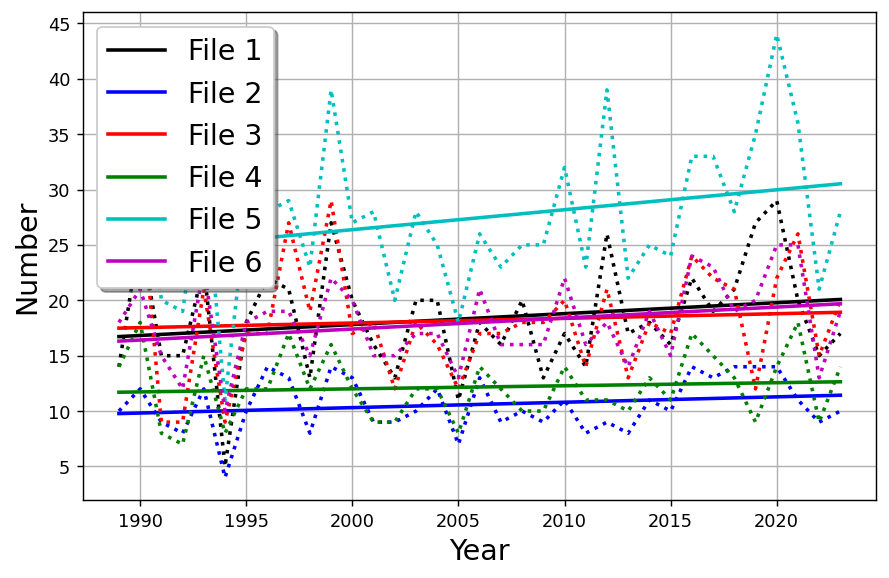

In [6]:

colors = ['k', 'b', 'r','g','c','m','0.3','0.7']
labels = ['File 1','File 2','File 3','File 4','File 5','File 6','File 7','File 8']


golden = (pylab.sqrt(5)+1.)/2.
figprops = dict(figsize=(8., 8./ golden ), dpi=128)    
adjustprops = dict(left=0.15, bottom=0.1, right=0.90, top=0.93, wspace=0.2, hspace=0.2) 
fig = plt.figure(**figprops)   # New figure
ax1 = fig.add_subplot(1, 1, 1)
#p1, = ax1.plot(xarr, num_vs_year, color=colors, label=labels)
slopes = np.empty([num_files])
corrs = np.empty([num_files])
pvals = np.empty([num_files])
#tstats = np.empty([num_files])
for ii in range(0,num_files):
    plotnow = num_vs_year[ii,:].squeeze()
    
    m,b = np.polyfit(year_range,plotnow,1)
    ynow = m*year_range + b
    num_vs_year_fit[ii,:] = ynow
    slopes[ii] = m*10. # per decade
    
    cornow,pnow = stats.pearsonr(plotnow,ynow)
    corrs[ii] = cornow  
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(year_range,plotnow)
        
    pvals[ii] = p_value 
    p1, = ax1.plot(year_range, plotnow, colors[ii],linestyle='dotted',linewidth=2.0)
    p2, = ax1.plot(year_range, ynow, colors[ii],linestyle='solid',linewidth=2.0,label=labels[ii])


ax1.grid(True, linestyle='-')
legend = ax1.legend(loc='upper left', shadow=True, fontsize=label_fontsize)      
plt.xlabel('Year',fontsize=label_fontsize)
plt.ylabel('Number',fontsize=label_fontsize)
print('Season: Annual')
print('Slopes (per decade):')
print(slopes)
print('P-values that slope is different from zero:')
print(pvals)
print('Correlations:')
print(corrs)

In [7]:
slopes_ann = np.empty([num_files])
corrs_ann = np.empty([num_files])
pvals_ann = np.empty([num_files])

slopes_djf = np.empty([num_files])
corrs_djf = np.empty([num_files])
pvals_djf = np.empty([num_files])

slopes_mam = np.empty([num_files])
corrs_mam = np.empty([num_files])
pvals_mam = np.empty([num_files])

slopes_jja = np.empty([num_files])
corrs_jja = np.empty([num_files])
pvals_jja = np.empty([num_files])

slopes_son = np.empty([num_files])
corrs_son = np.empty([num_files])
pvals_son = np.empty([num_files])

for ii in range(0,num_files):

    plotnow_ann = num_vs_year[ii,:].squeeze() 
    plotnow_djf = num_vs_year_djf[ii,:].squeeze() 
    plotnow_mam = num_vs_year_mam[ii,:].squeeze()
    plotnow_jja = num_vs_year_jja[ii,:].squeeze() 
    plotnow_son = num_vs_year_son[ii,:].squeeze()        
    
    m,b = np.polyfit(year_range,plotnow_ann,1)
    num_vs_year_fit_ann[ii,:] = m*year_range + b
    slopes_ann[ii] = m*10.0
    corrs_ann[ii],pnow = stats.pearsonr(plotnow_ann,num_vs_year_fit_ann[ii,:])
    slope, intercept, r_value, pvals_ann[ii], std_err = stats.linregress(year_range,plotnow_ann)

    m,b = np.polyfit(year_range,plotnow_djf,1)
    num_vs_year_fit_djf[ii,:] = m*year_range + b
    slopes_djf[ii] = m*10.0
    corrs_djf[ii],pnow = stats.pearsonr(plotnow_djf,num_vs_year_fit_djf[ii,:])
    slope, intercept, r_value, pvals_djf[ii], std_err = stats.linregress(year_range,plotnow_djf)

    m,b = np.polyfit(year_range,plotnow_mam,1)
    num_vs_year_fit_mam[ii,:] = m*year_range + b
    slopes_mam[ii] = m*10.0
    corrs_mam[ii],pnow = stats.pearsonr(plotnow_mam,num_vs_year_fit_mam[ii,:])
    slope, intercept, r_value, pvals_mam[ii], std_err = stats.linregress(year_range,plotnow_mam)

    m,b = np.polyfit(year_range,plotnow_jja,1)
    num_vs_year_fit_jja[ii,:] = m*year_range + b
    slopes_jja[ii] = m*10.0
    corrs_jja[ii],pnow = stats.pearsonr(plotnow_jja,num_vs_year_fit_jja[ii,:])
    slope, intercept, r_value, pvals_jja[ii], std_err = stats.linregress(year_range,plotnow_jja)

    m,b = np.polyfit(year_range,plotnow_son,1)
    num_vs_year_fit_son[ii,:] = m*year_range + b
    slopes_son[ii] = m*10.0
    corrs_son[ii],pnow = stats.pearsonr(plotnow_son,num_vs_year_fit_son[ii,:])
    slope, intercept, r_value, pvals_son[ii], std_err = stats.linregress(year_range,plotnow_son)
    

print('Slopes: (Annual)')
print(slopes_ann)
print('P-values that slope is different from zero:')
print(pvals_ann)
print('Correlations:')
print(corrs_ann)



if write_annual_file == True:
    outfile = open(outpath_print + 'VRILE_Table2_slopes.txt','w')
    outfile.write('%-22s %-6s %-6s %-6s %-6s %-6s\n' % ('Slopes (per decade)   ','Annual', '   DJF','   MAM','   JJA','   SON'))
    outfile.write('%-22s %6.1f %6.1f %6.1f %6.1f %6.1f\n' %('Mean removed', slopes_ann[0], slopes_djf[0], slopes_mam[0],slopes_jja[0], slopes_son[0]))
    outfile.write('%-22s %6.1f %6.1f %6.1f %6.1f %6.1f\n' %('Mean removed (Unique)', slopes_ann[1], slopes_djf[1], slopes_mam[1],slopes_jja[1], slopes_son[1]))
    outfile.write('%-22s %6.1f %6.1f %6.1f %6.1f %6.1f\n' %('Filtered', slopes_ann[2], slopes_djf[2], slopes_mam[2],slopes_jja[2], slopes_son[2]))
    outfile.write('%-22s %6.1f %6.1f %6.1f %6.1f %6.1f\n' %('Filtered (Unique)', slopes_ann[3], slopes_djf[3], slopes_mam[3],slopes_jja[3], slopes_son[3]))
    outfile.write('%-22s %6.1f %6.1f %6.1f %6.1f %6.1f\n' %('Total', slopes_ann[4], slopes_djf[4], slopes_mam[4],slopes_jja[4], slopes_son[4]))
    outfile.write('%-22s %6.1f %6.1f %6.1f %6.1f %6.1f\n' %('Total (Unique)', slopes_ann[5], slopes_djf[5], slopes_mam[5],slopes_jja[5], slopes_son[5]))
    outfile.close()

    outfile = open(outpath_print + 'VRILE_Table2_pvalues.txt','w')
    outfile.write('%-22s %-6s %-8s %-8s %-8s %-8s\n' % ('P-values                ','Annual', '    DJF','    MAM','    JJA','     SON'))
    outfile.write('%-22s %8.5f %8.5f %8.5f %8.5f %8.5f\n' %('Mean removed', pvals_ann[0], pvals_djf[0], pvals_mam[0],pvals_jja[0], pvals_son[0]))
    outfile.write('%-22s %8.5f %8.5f %8.5f %8.5f %8.5f\n' %('Mean removed (Unique)', pvals_ann[1], pvals_djf[1], pvals_mam[1],pvals_jja[1], pvals_son[1]))
    outfile.write('%-22s %8.5f %8.5f %8.5f %8.5f %8.5f\n' %('Filtered', pvals_ann[2], pvals_djf[2], pvals_mam[2],pvals_jja[2], pvals_son[2]))
    outfile.write('%-22s %8.5f %8.5f %8.5f %8.5f %8.5f\n' %('Filtered (Unique)', pvals_ann[3], pvals_djf[3], pvals_mam[3],pvals_jja[3], pvals_son[3]))
    outfile.write('%-22s %8.5f %8.5f %8.5f %8.5f %8.5f\n' %('Total', pvals_ann[4], pvals_djf[4], pvals_mam[4],pvals_jja[4], pvals_son[4]))
    outfile.write('%-22s %8.5f %8.5f %8.5f %8.5f %8.5f\n' %('Total (Unique)', pvals_ann[5], pvals_djf[5], pvals_mam[5],pvals_jja[5], pvals_son[5]))
    outfile.close()

#plt.show()        

Slopes: (Annual)
[0.9859944  0.48739496 0.42016807 0.27731092 1.80112045 0.99159664]
P-values that slope is different from zero:
[0.24955191 0.23817537 0.63998541 0.58523021 0.11841295 0.11455593]
Correlations:
[0.1999165  0.20469625 0.08190033 0.09550771 0.26881449 0.27155992]


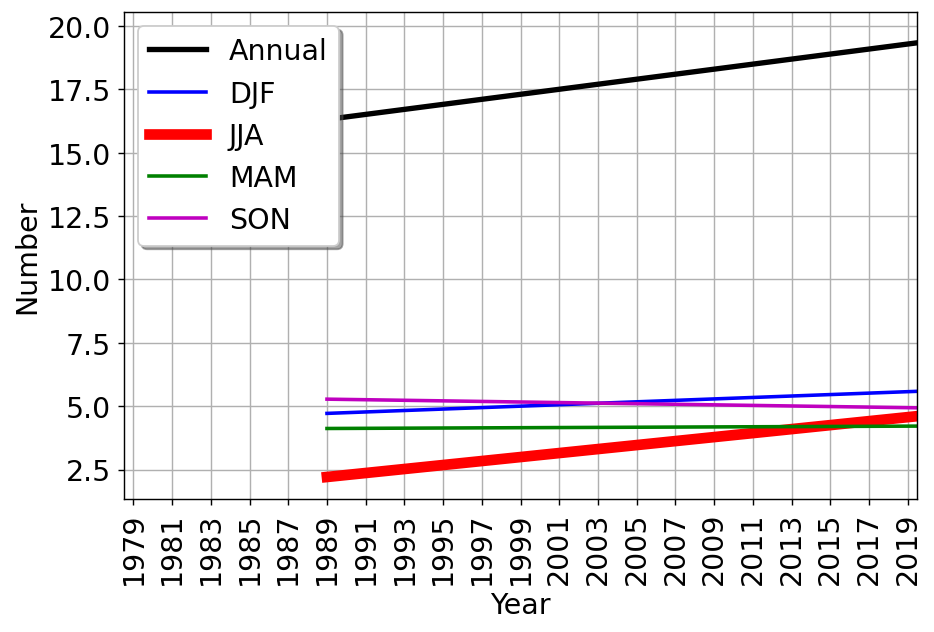

In [8]:
rotang = 90
yearbins = np.arange(1978,2020,1)
xticklabels_all = yearbins[1::2]
colors = ['k', 'b', 'r','g','m']
labels = ['Annual','DJF','JJA','MAM','SON']
#labels = ['5%','5% Unique']
fileindex = 5
alphacrit = 0.05
fig = plt.figure(**figprops)   # New figure
ax1 = fig.add_subplot(1, 1, 1)
if ( pvals_ann[fileindex] < alphacrit ):
    linew = 6
else:
    linew = 3
p1, = ax1.plot(year_range, num_vs_year_fit_ann[fileindex,:], colors[0],linestyle='solid',linewidth=linew,label=labels[0])
if ( pvals_djf[fileindex] < alphacrit ):
    linew = 6
else:
    linew = 2
p1, = ax1.plot(year_range, num_vs_year_fit_djf[fileindex,:], colors[1],linestyle='solid',linewidth=linew,label=labels[1])
if ( pvals_jja[fileindex] < alphacrit ):
    linew = 6
else:
    linew = 2
p1, = ax1.plot(year_range, num_vs_year_fit_jja[fileindex,:], colors[2],linestyle='solid',linewidth=linew,label=labels[2])
if ( pvals_mam[fileindex] < alphacrit ):
    linew = 6
else:
    linew = 2
p1, = ax1.plot(year_range, num_vs_year_fit_mam[fileindex,:], colors[3],linestyle='solid',linewidth=linew,label=labels[3])
if ( pvals_son[fileindex] < alphacrit ):
    linew = 6
else:
    linew = 2
p1, = ax1.plot(year_range, num_vs_year_fit_son[fileindex,:], colors[4],linestyle='solid',linewidth=linew,label=labels[4])
ax1.grid(True, linestyle='-')
legend = ax1.legend(loc='upper left', shadow=True, fontsize=label_fontsize)      
plt.xlabel('Year',fontsize=label_fontsize)
plt.ylabel('Number',fontsize=label_fontsize)

ax1.set_xticks(xticklabels_all)
    
um.label_options(ax1,fontsize=label_fontsize,xaxis_opt=False,yaxis_opt=True,bold_opt=False)
ax1.set_xticklabels(xticklabels_all,rotation=rotang,fontsize=label_fontsize)
plt.xlim([yearbins[1]-0.5,yearbins[-1]+0.5])
plt.xlabel('Year',fontsize=label_fontsize)
ax1.set_ylabel('Number',fontsize=label_fontsize)
save_name = 'VRILE_trends_vsYear.png'
plt.savefig(imagedir + save_name, bbox_inches='tight')
plt.show()